&nbsp;&nbsp;&nbsp;&nbsp;  1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

There are two-six sided dice, this means the number of combination that are possible is $6^2$. Rolling snake eyes means both dice must land on 1, there's only one possible combination for that, hence the probabily for rolling snake eyes is $\frac {1}{36}$. Rolling a seven means the tw|o dice must add up to 7, there are 6 possible combinations for the two dice that would give us a sum of 7. So the probabily of rolling 7 given two six-sided dice is $\frac {6}{36}$. SO, rolling a 7 is more probable.

&nbsp;&nbsp;&nbsp;&nbsp; RATIO OF PROBABILITES: $\frac {1}{36}$ : $\frac {6}{36}$

## &nbsp;&nbsp;&nbsp;&nbsp; 2) Use the convolution operator to determine the probability of the sum of 2 six sided dice.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [17]:
dice_probs = [1/6]*6

In [18]:
convolved_sum = np.convolve(dice_probs, dice_probs, mode='full')
out_come = np.linspace(2, 12, 11)

Possible combinations:
<br/> Sum &nbsp;&nbsp; Combo
<br/> 2 &nbsp; --> (1, 1)
<br/> 3 &nbsp; --> (1, 2) (2, 1)
<br/> 4 &nbsp; --> (1, 3) (3, 1) (2, 2)
<br/> 5 &nbsp; --> (1, 4) (4, 1) (2, 3) (3,2)
<br/> 6 &nbsp; --> (1, 5) (5, 1) (2, 4) (4, 2) (3, 3)
<br/> 7 &nbsp; --> (1, 6) (6, 1) (2, 5) (5, 2) (3, 4) (4, 3)
<br/> 8 &nbsp; --> (2, 6) (6, 2) (3, 5) (5, 3) (4, 4)
<br/> 9 &nbsp; --> (3, 6) (6, 3) (4, 5) (5, 4)
<br/> 10 --> (4, 6) (6, 4) (5, 5)
<br/> 11 --> (5, 6) (6, 5)
<br/> 12 --> (6, 6)

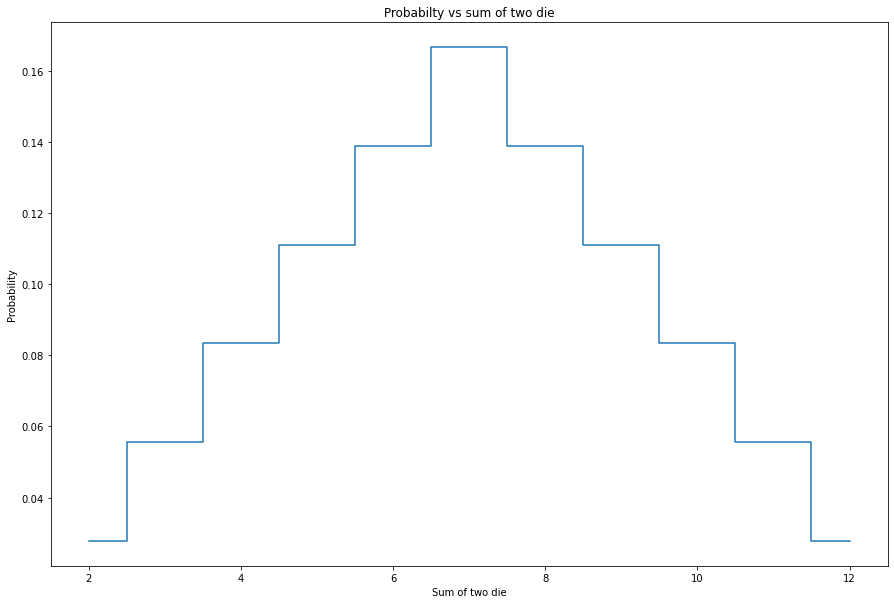

In [19]:

plt.step(out_come, convolved_sum, where = 'mid')
plt.title('Probabilty vs sum of two die')
plt.ylabel('Probability')
plt.xlabel('Sum of two die')
plt.show()

## &nbsp;&nbsp;&nbsp;&nbsp; 3) Calculate the mean and the variance of the distribution

In [20]:
mean = 0
for i in range(len(out_come)):
               mean += out_come[i]*convolved_sum[i]

In [21]:
var = 0
for i in range(len(out_come)):
    var += ((out_come[i]-mean)**2)*convolved_sum[i]

## &nbsp;&nbsp;&nbsp;&nbsp; 5) Graph the average of 10 dice

In [22]:

for i in range(8):
    convolved_sum = np.convolve(convolved_sum, dice_probs, mode='full')
    

In [23]:
convolved_sum

array([1.65381717e-08, 1.65381717e-07, 9.09599443e-07, 3.63839777e-06,
       1.18247928e-05, 3.31094197e-05, 8.26081676e-05, 1.87542867e-04,
       3.92946959e-04, 7.67701930e-04, 1.40951530e-03, 2.44665712e-03,
       4.03407353e-03, 6.34189270e-03, 9.53533096e-03, 1.37465945e-02,
       1.90415547e-02, 2.53867551e-02, 3.26236936e-02, 4.04573294e-02,
       4.84643679e-02, 5.61241048e-02, 6.28704385e-02, 6.81581055e-02,
       7.15327194e-02, 7.26928060e-02, 7.15327194e-02, 6.81581055e-02,
       6.28704385e-02, 5.61241048e-02, 4.84643679e-02, 4.04573294e-02,
       3.26236936e-02, 2.53867551e-02, 1.90415547e-02, 1.37465945e-02,
       9.53533096e-03, 6.34189270e-03, 4.03407353e-03, 2.44665712e-03,
       1.40951530e-03, 7.67701930e-04, 3.92946959e-04, 1.87542867e-04,
       8.26081676e-05, 3.31094197e-05, 1.18247928e-05, 3.63839777e-06,
       9.09599443e-07, 1.65381717e-07, 1.65381717e-08])

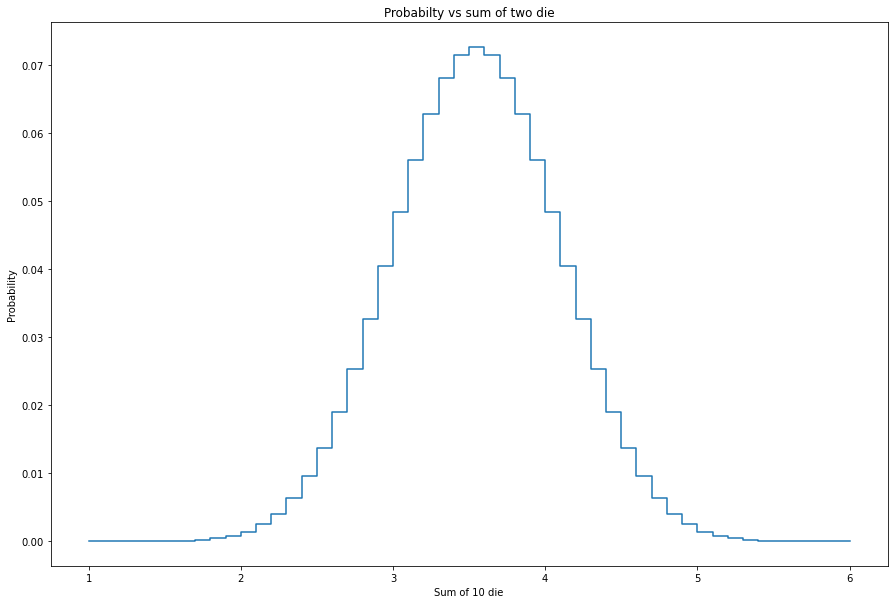

In [24]:
x = np.linspace(1,6, len(convolved_sum))
plt.step(x, y = convolved_sum, where='post', label='post')
plt.title('Probabilty vs sum of two die')
plt.ylabel('Probability')
plt.xlabel('Sum of 10 die')
plt.show()

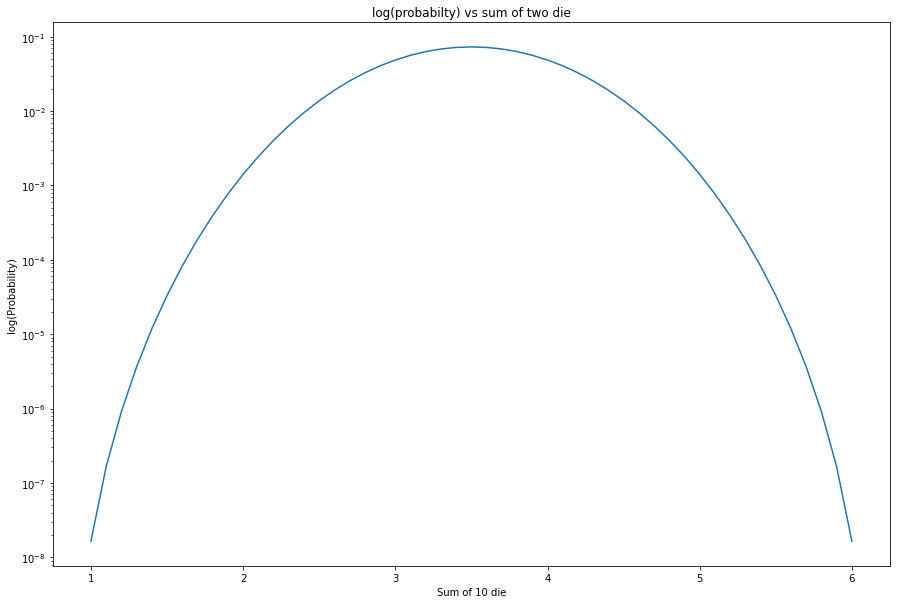

In [25]:
plt.semilogy(x, convolved_sum )
plt.title('log(probabilty) vs sum of two die')
plt.ylabel('log(Probability)')
plt.xlabel('Sum of 10 die')
plt.show()

When we plot the convoluted distribution in a semi-ylog plot, we get what looks like a parabola. And so this this distribution is gausian 

## &nbsp;&nbsp;&nbsp;&nbsp; 5) Show that the sum and average of an initially Gaussian distribution is also a Guassian

In homework 1, we generated a gausian distribution, and so I will use this to anwer this question.

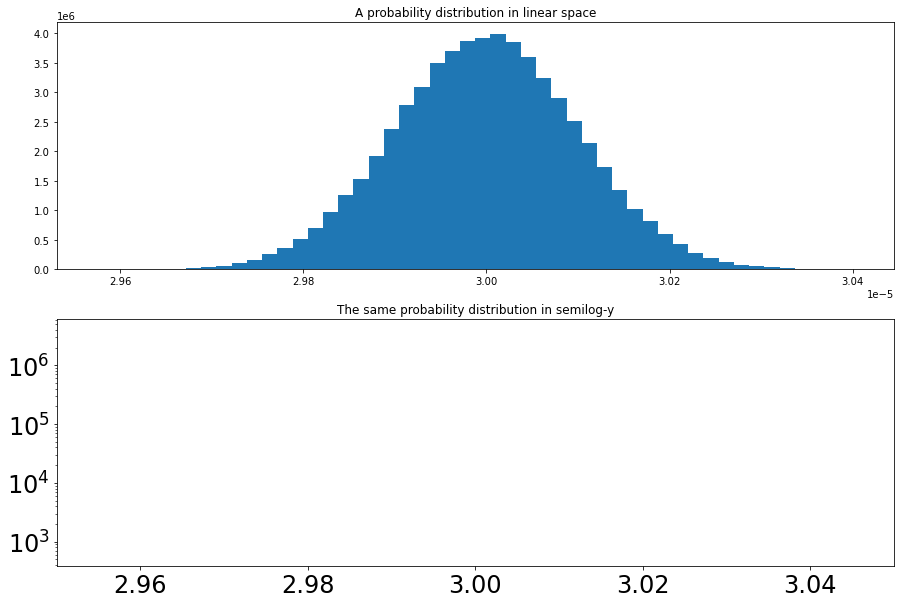

In [72]:
plt.rcParams["figure.figsize"] = (15,10)

d = stats.norm.rvs(loc = 3.0, scale = 0.01, size = 100000)/100000

fig, (ax1, ax2)  = plt.subplots(2)
ax1.hist(d,50, density=True)
ax1.set_title('A probability distribution in linear space')
plt.tick_params(labelsize = 24)
plt.xlim([2.95,3.05])
x = np.linspace(2.95,3.05,1000)
# ax.plot(x,stats.norm.pdf(x,loc = 3., scale = 0.01),linewidth = 8,alpha = 0.7)


ax2 = plt.hist(d,50, density=True)

plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.title('The same probability distribution in semilog-y')
plt.xlim([2.95,3.05])
plt.show()

By looking at the semilogy plot of the probability distribution, we can say that what we have is a Gausian distribution: so now we can do our task.

## &nbsp; sums

sum of 4 initially Gausian distribution

In [64]:
convolved_sum_Gausian = np.convolve(d, d, mode='full')
for i in range(1):
    convolved_sum = np.convolve(convolved_sum_Gausian, d, mode='full')


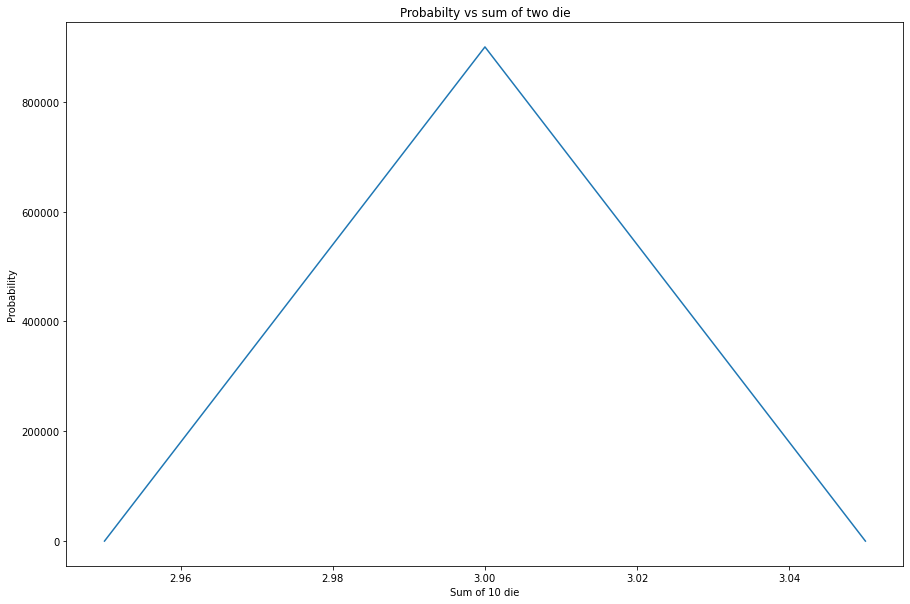

In [71]:
# need to fix x axis

x = np.linspace(2.95,3.05,len(convolved_sum_Gausian))
plt.step(x, y = convolved_sum_Gausian, where='post', label='post')
plt.title('Probabilty vs sum of two die')
plt.ylabel('Probability')
plt.xlabel('Sum of 10 die')
plt.show()